In [ ]:
pip install wikipedia

In [ ]:
pip install scikit-network

In [ ]:
##Using Wikipedia Webcrawler

In [1]:
import wikipedia as w
import pandas as pd

from time import sleep

In [2]:
def search_wiki(search_list):

    origin_pages = []
    found_pages = []

    # later, we will drop these to keep the properly named page in the network

    for search in search_list:

        print('searching topic: {}'.format(search))
        
        try:
            #page = w.page(search)
            #search_results = page.links
            search_results = w.search(search)

            for found_page in search_results:

                origin_pages.append(search)
                found_pages.append(found_page)

        except:
            
            print('not found')
            
        sleep(0.3)
        
    return origin_pages, found_pages

In [3]:
def create_edgelist_df(seed_searches, iterations=2):

    completed = []
    sources = []
    targets = []

    for i in range(iterations):
        
        print('starting iteration: {}'.format(i))
        print()

        if i == 0:

            search_list = seed_searches

        origin_pages, found_pages = search_wiki(search_list)

        completed.extend(origin_pages)
        sources.extend(origin_pages)
        targets.extend(found_pages)

        search_list = sorted(set([t for t in targets if t not in completed]))
        print(len(search_list))
        print()
        print(search_list)
        print()
        
    df = pd.DataFrame(list(zip(sources, targets)))
    df.columns = ['source', 'target']
                  
    return df

In [4]:
seed_searches = ['cats']

df = create_edgelist_df(seed_searches, iterations=3) # keep it low (1-3) or this will take forever

starting iteration: 0

searching topic: cats
10

['Aging in cats', 'Big cat', 'Black cat', 'Cat', 'Cats (disambiguation)', 'Cats (musical)', 'Cats, Cats, Cats!', 'Herding cats', 'The Cats', 'Tortoiseshell cat']

starting iteration: 1

searching topic: Aging in cats
searching topic: Big cat
searching topic: Black cat
searching topic: Cat
searching topic: Cats (disambiguation)
searching topic: Cats (musical)
searching topic: Cats, Cats, Cats!
searching topic: Herding cats
searching topic: The Cats
searching topic: Tortoiseshell cat
72

['.cat', 'Aging in dogs', 'Alley cat', 'Anarchist symbolism', 'Bengal cat', 'Bicolor cat', 'Big Cat Diary', 'Big Cat Records', 'Big Cat Rescue', 'Big cat (disambiguation)', 'Black Cat (Marvel Comics)', 'Black Cat (song)', 'Black Cat, White Cat', 'Black cat (disambiguation)', 'Black-footed cat', 'Bombalurina (cat)', 'Bombay cat', 'British big cats', 'Calico cat', 'Cat (disambiguation)', 'Cat Herders', 'Cat Stevens', 'Cat coat genetics', 'Cat cognitive suppo

In [5]:
df.shape

(830, 2)

In [6]:
df.head()

,source,target
0,cats,Cat
1,cats,Cats (disambiguation)
2,cats,Cats (musical)
3,cats,"Cats, Cats, Cats!"
4,cats,Aging in cats


In [7]:
outfile = 'desktop/cats_edgelist.csv'

df.to_csv(outfile, index=False)

In [8]:
# verify the outfile looks good

df = pd.read_csv(outfile)
df.head()

,source,target
0,cats,Cat
1,cats,Cats (disambiguation)
2,cats,Cats (musical)
3,cats,"Cats, Cats, Cats!"
4,cats,Aging in cats


In [9]:
df.shape

(830, 2)

In [ ]:
### Analysis Part 2

In [10]:
import networkx as nx
import numpy as np
import pandas as pd

from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [44]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

In [11]:
data = r'desktop/cats_edgelist.csv'

df = pd.read_csv(data)
df.head()

,source,target
0,cats,Cat
1,cats,Cats (disambiguation)
2,cats,Cats (musical)
3,cats,"Cats, Cats, Cats!"
4,cats,Aging in cats


In [32]:
G = nx.from_pandas_edgelist(df)

# drop the seed nodes; we will have proper names from pages found
seed_nodes = ['Cat', 'Cats (disambiguation)', 'Cats (musical)', 'Cats, Cats, Cats!']
G.remove_nodes_from(seed_nodes)

In [27]:
print(G)

Graph with 504 nodes and 720 edges


In [19]:
import networkx as nx

In [22]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5):

  import numpy as np
  from IPython.display import SVG
  from sknetwork.visualization import svg_graph
  from sknetwork.data import Bunch
  from sknetwork.ranking import PageRank
  from scipy.sparse import csr_matrix

  adjacency = nx.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr')
  adjacency = csr_matrix(adjacency) # fix to weird sknetwork-csr issue; comment out to troubleshoot
  names = np.array(list(G.nodes))
  graph = Bunch()
  graph.adjacency = adjacency
  graph.names = np.array(names)
  pagerank = PageRank()
  scores = pagerank.fit_transform(adjacency)

  if show_names:
    image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
  else:
    image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)
  return SVG(image)

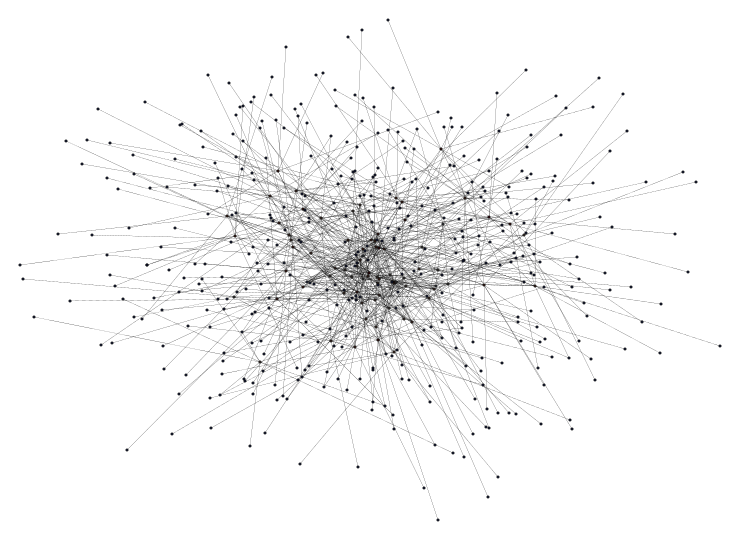

In [43]:
draw_graph(G, node_size=1, show_names=False, edge_width=0.1)

In [33]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
Heart of the Ocean (disambiguation),0.010292
Schrödinger's cat (disambiguation),0.010082
Black cat (disambiguation),0.010046
Trent Lott,0.009929
Cat's in the Cradle,0.009733
List of awards and nominations received by Cats (musical),0.009733
Fisher cat (disambiguation),0.009547
David Michaels (actor),0.009504
Sophie Melville,0.009504
Cat's eye,0.009439


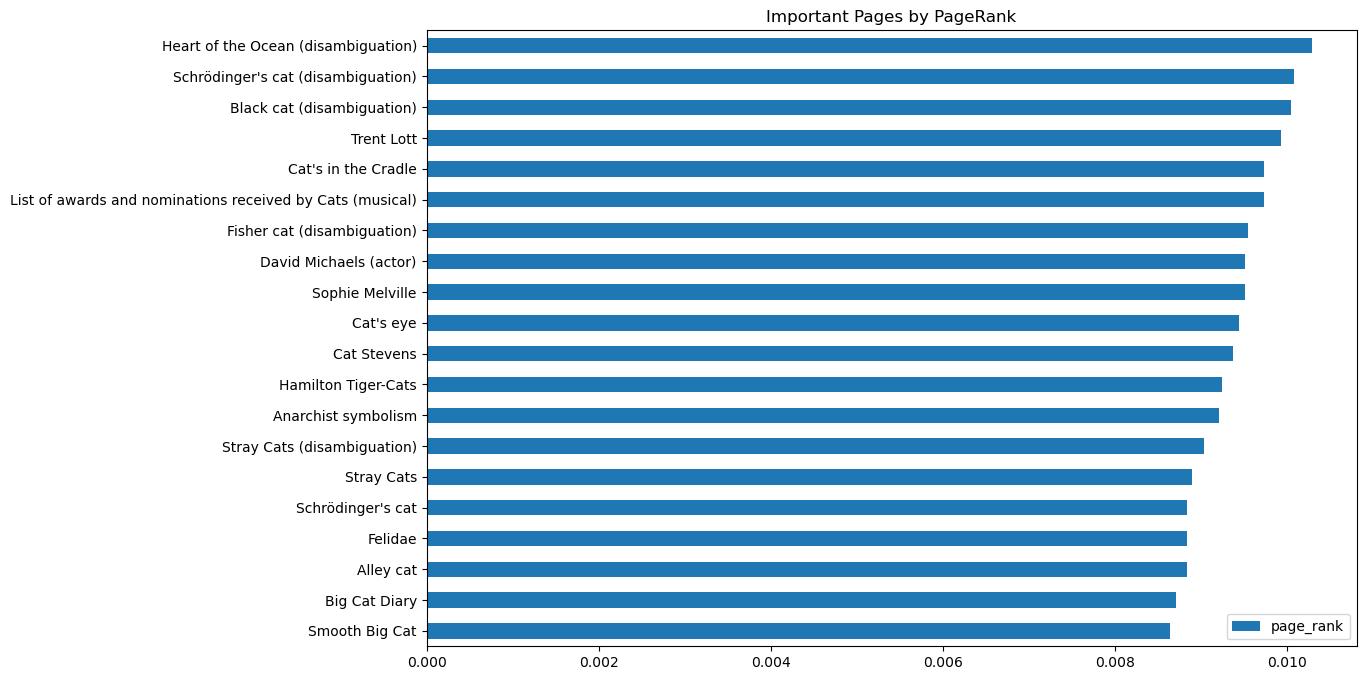

In [34]:
title = 'Important Pages by PageRank'

pr_df.head(20).plot.barh(figsize=(12,8), title=title).invert_yaxis()

In [35]:
top_nodes = pr_df.head(20).index.values

In [36]:
top_nodes[0]

'Heart of the Ocean (disambiguation)'

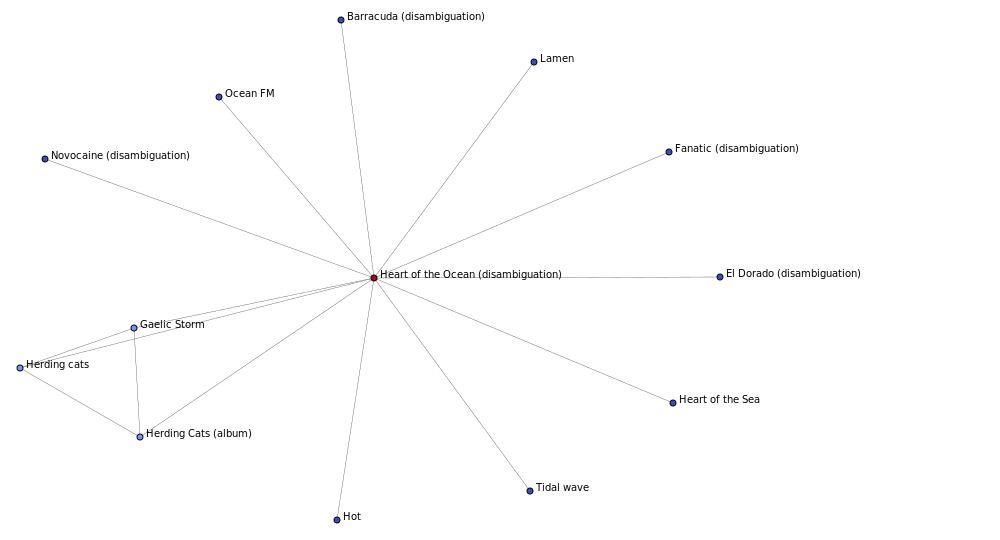

In [37]:
ego = top_nodes[0]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

In [38]:
# you can look at the nodes in the ego network this way, to find interesting topics

nodes = sorted(G_ego.nodes)
nodes

['Barracuda (disambiguation)',
 'El Dorado (disambiguation)',
 'Fanatic (disambiguation)',
 'Gaelic Storm',
 'Heart of the Ocean (disambiguation)',
 'Heart of the Sea',
 'Herding Cats (album)',
 'Herding cats',
 'Hot',
 'Lamen',
 'Novocaine (disambiguation)',
 'Ocean FM',
 'Tidal wave']

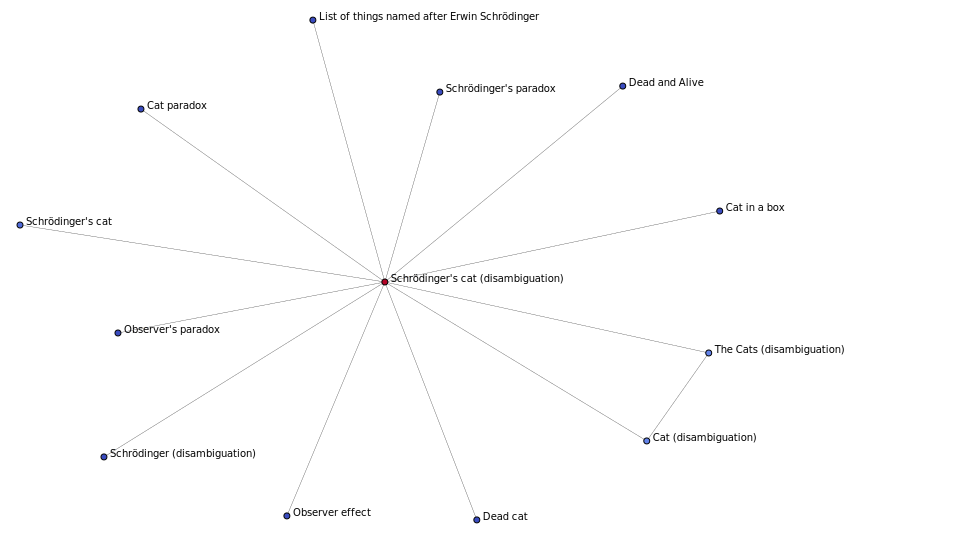

In [39]:
ego = top_nodes[1]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

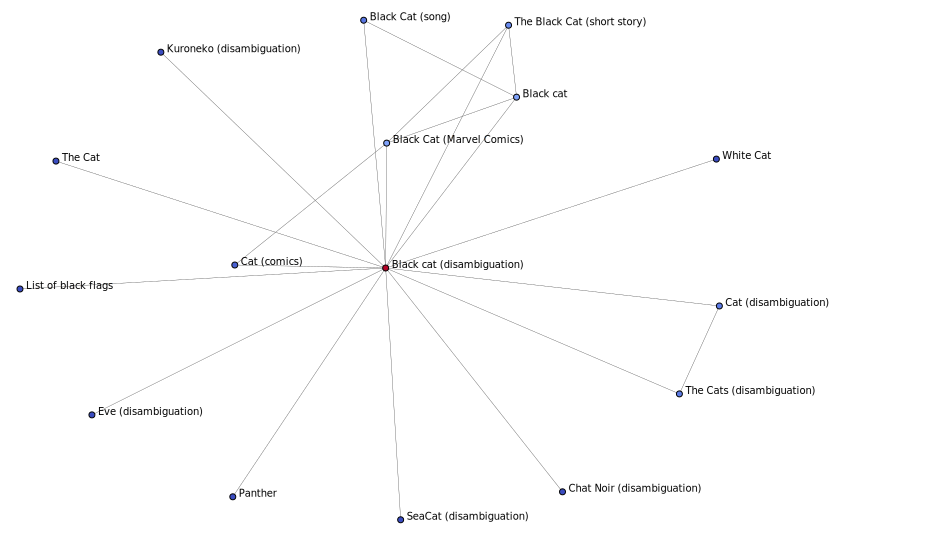

In [40]:
ego = top_nodes[2]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

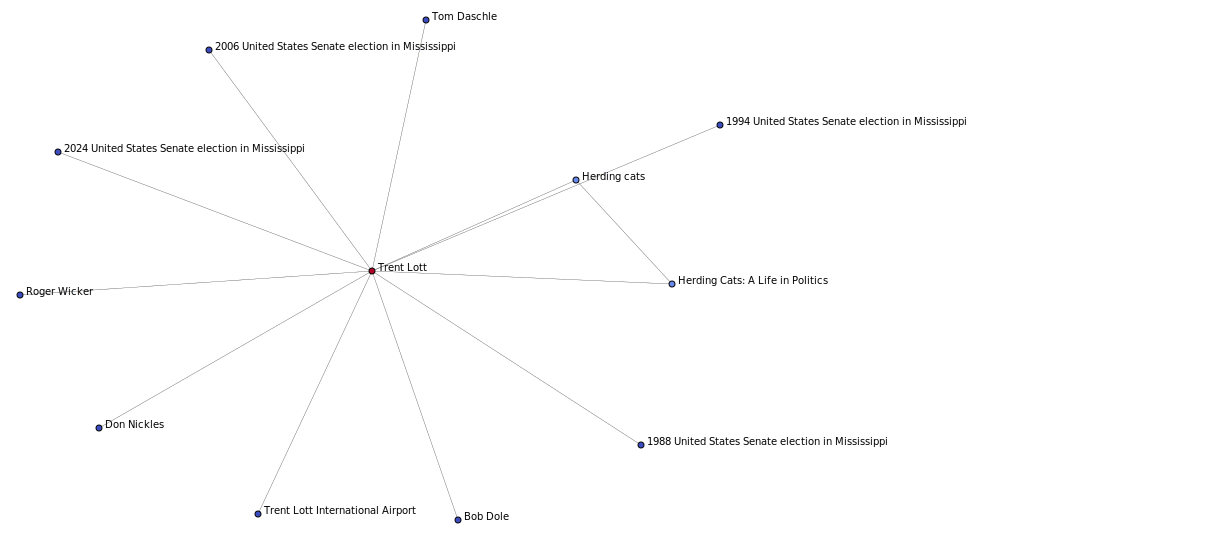

In [41]:
ego = top_nodes[3]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)

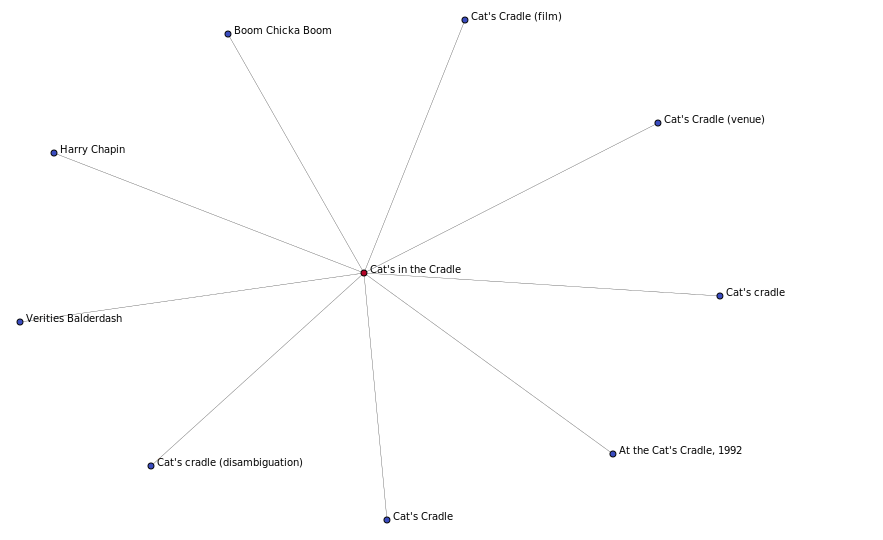

In [42]:
ego = top_nodes[4]

G_ego = nx.ego_graph(G, ego)

draw_graph(G_ego, show_names=True, node_size=3, edge_width=0.3)